In [83]:
BEIJING,SHANGHAI,CHANGCHUN,WUHAN,WULUMUQI,NEWYORK,SHENZHEN,GUANGZHOU,BANGKOK = """
BEIJING SHANGHAI CHANGCHUN WUHAN WULUMUQI NEWYORK SHENZHEN GUANGZHOU BANGKOK
""".split()#按格式分词，前面的每一变量指向后面的每一字符.slit将目标切割成元素。切割后若不具体对应赋值，则以列表形式存在


In [84]:
print (BEIJING,CHANGCHUN,NEWYORK)

BEIJING CHANGCHUN NEWYORK


In [85]:
dictionary = {}

In [86]:
connection = {
    CHANGCHUN: [BEIJING],
    WULUMUQI: [BEIJING], 
    BEIJING: [WULUMUQI, CHANGCHUN, WUHAN, SHENZHEN, NEWYORK],
    NEWYORK: [BEIJING, SHANGHAI],
    SHANGHAI: [NEWYORK, WUHAN],
    WUHAN: [SHANGHAI, BEIJING, GUANGZHOU],
    GUANGZHOU: [WUHAN, BANGKOK],
    SHENZHEN: [WUHAN, BANGKOK],
    BANGKOK: [SHENZHEN, GUANGZHOU]
}#用字典connection构建联系，冒号前的内容为索引，冒号后的部分为特定索引所对应的元素的集合

In [87]:
print(connection)

{'CHANGCHUN': ['BEIJING'], 'WULUMUQI': ['BEIJING'], 'BEIJING': ['WULUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK'], 'NEWYORK': ['BEIJING', 'SHANGHAI'], 'SHANGHAI': ['NEWYORK', 'WUHAN'], 'WUHAN': ['SHANGHAI', 'BEIJING', 'GUANGZHOU'], 'GUANGZHOU': ['WUHAN', 'BANGKOK'], 'SHENZHEN': ['WUHAN', 'BANGKOK'], 'BANGKOK': ['SHENZHEN', 'GUANGZHOU']}


In [88]:
import networkx as n#加入networks，并将之简称为n
%matplotlib inline#为了使图像可以在jupyter notebook中显示；老师您说plt.show()这句命令也可以起到同样的作用，但是我使用的时候会进行报错，
#这里的意思是说需要再进行额外的import操作吗？    报错内容如下：NameError                                 Traceback (most recent call last)
#<ipython-input-26-1eb00ff78cf2> in <module>
#----> 1 plt.show()

#NameError: name 'plt' is not defined



UsageError: unrecognized arguments: notebook中显示；老师您说plt.show()这句命令也可以起到同样的作用，但是我使用的时候会进行报错，


In [99]:
g = n.Graph(connection)

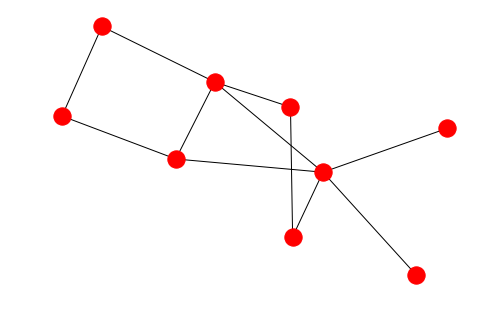

In [90]:
n.draw(g)

In [111]:
def research_get_shortest_way (start,destination,connection_graph):
    #此函数return最短路径，所以输出应为一个列表，其中有序排列的元素表示按顺序经过的子节点。由于目的是得到最短的路径，所以要求遍历所有的
    #可能组合。由此我们使用广度优先的思路进行coding。函数输入分别为初始地点，结束地点和以图为组织结构的内部逻辑关联。转换为物理模型，即为
    #知道边界条件和内部演变逻辑，求特定极值的问题。内部逻辑是其中的重中之重。
    stored_data = [[start]]#待处理数据存放处，对该库有读写两个基本操作
    check = set()#检测元素是否已经读取过
    
    while stored_data:
        reader_one = stored_data.pop(0)#需要特别注意的是，这里取出的是列表而不是元素，所以这里读头一得到的结果
        #需要由读头二进行第二次读取以得到列表中的元素.最终输出的也是读头一中的列表
        reader_two = reader_one[-1]#注意，两个读头的读取位置不同,该读头读取的是元素
        
        if reader_two in check:
            continue#如果读头二读取的元素在检测组中，那么直接跳过该循环，进行下一循环。在进行该判断前，该元素所在组已经被剔除出了未处理数据库
        
        successors = connection_graph[reader_two]#由connection_graph这张“图鉴”，得到特定节点的后续所有子节点，这里successors是一个列表
        print(successors)
        for i in successors:
            if i == destination:
                return reader_one + [i]#如果子节点为最终目的地，根据广度优先的逻辑，已经得到了一个最优解，可续已经可以终止了
            else:
                stored_data.append(reader_one + [i])#将新的待处理数据添加到未处理数据库里，这个新的数据并没有丢弃原先的数据，只是增加了新的
                #数据，所以读头二的读取位置才是[-1]，这样正是为了避免重复读取；加减操作比append和add的指令方便的多，要充分利用
                
        stored_data = sorted(stored_data,key=len)#这里是很关键的一步，对新的待处理数据库（数据库中的是一个个列表而不是元素）根据元素的数目
        #进行重整，也正是这个重整决定读头一的读取位置为(0)。也正是这个排序，实现了广度优先，只有将一层的所有可能都遍历之后（扫场），程序才会进行到
        #入下一层
        
        check.add(reader_two)#对搜索过的节点进行记录；add加元素，append加列表
    

            
                
        
        
        
       
            
            
            
   
    
    

In [113]:
print(research_get_shortest_way(BEIJING,GUANGZHOU,connection))#注意这里的“图鉴”是最初定义的字典connection而不是图的g

['WULUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
['BEIJING']
['BEIJING']
['SHANGHAI', 'BEIJING', 'GUANGZHOU']
['BEIJING', 'WUHAN', 'GUANGZHOU']


In [104]:
def bfs (start,destination,connection_graph):
    stored_data = [start]#和上面不同，这里仅仅是遍历整个图，而不需要给出具体的输出，所以这里是元素而不是列表
    check = set()
    
    while stored_data:
        reader = stored_data.pop(0)
        if reader in check:
            continue
        
        successors = connection_graph[reader]
        
        print(reader,successors)
        
        stored_data = stored_data + successors#就和存货的发出成本计量一样，对于广度优先，采取先进先出。
        
        check.add(reader)
        
    
    

In [114]:
bfs(BEIJING,GUANGZHOU,connection)

BEIJING ['WULUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
WULUMUQI ['BEIJING']
CHANGCHUN ['BEIJING']
WUHAN ['SHANGHAI', 'BEIJING', 'GUANGZHOU']
SHENZHEN ['WUHAN', 'BANGKOK']
NEWYORK ['BEIJING', 'SHANGHAI']
SHANGHAI ['NEWYORK', 'WUHAN']
GUANGZHOU ['WUHAN', 'BANGKOK']
BANGKOK ['SHENZHEN', 'GUANGZHOU']


In [109]:
def dfs (start,destination,connection_graph):
    
    stored_data = [start]
    check = set()
    
    while stored_data:
        reader = stored_data.pop(0)
        if reader in check:
            continue
        
        successors = connection_graph[reader]
        
        print(reader,successors)
        
        stored_data = successors + stored_data#对于深度优先，采取先进后出。深度优先与广度优先唯一的区别就在于读取的先后顺序刚好相反
        
        check.add(reader)
    

In [115]:
dfs(BEIJING,GUANGZHOU,connection)

BEIJING ['WULUMUQI', 'CHANGCHUN', 'WUHAN', 'SHENZHEN', 'NEWYORK']
WULUMUQI ['BEIJING']
CHANGCHUN ['BEIJING']
WUHAN ['SHANGHAI', 'BEIJING', 'GUANGZHOU']
SHANGHAI ['NEWYORK', 'WUHAN']
NEWYORK ['BEIJING', 'SHANGHAI']
GUANGZHOU ['WUHAN', 'BANGKOK']
BANGKOK ['SHENZHEN', 'GUANGZHOU']
SHENZHEN ['WUHAN', 'BANGKOK']


In [ ]:
SENTENCE GENERATION

In [1]:
import random#由于需要随机选取，所以需要添加random组件


In [12]:
grammar = """
sentence => noun_phrase verb_phrase 
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>   蓝色的 |  好看的 | 小小的
"""
#生成模板，这里的模板是字符，不方便操作，所以我们需要将文字表示的规则列表或字典化。相比于字符，列表与字典的操作空间更大

In [13]:
def get_rules(grammar_str,sep = '=>'):
    #输入为字符表示的规则和将规则列表化的切割指标
    rules = {}
    for i in grammar_str.split('\n'):
        i = i.strip()#第一步的规范化，去除多余的空格。这一步具有更深刻的意义吗？如果不进行该操作，会有什么影响吗？
        #！！！！！！！！！！！！！！！！！！！！！
        if not i :
            continue
        target,compontent = i.split(sep)
        
        rules[target.strip()] = [r.split() for r in compontent.split('|')]#这一句是填充词典的一句,二次细分。需要格外注意的是，r是元素。compontent
        #可能是元素也可能是列表。注意这里切割的顺序，先对'|'切分，再对空格切分。这一步在下面的生成等式里是关键的步骤
    return rules
#我们对最初始的文本规则进行了三次规范：1.将一个整体由换行符分割为一行一行；2.对每一行，用指定的分割记号，切分为由元素组成的列表；3.对上面
#列表中的特定元素（此处为列表，也就是列表套列表）在进行细分

In [14]:
def gene(rules, target='sentence'):
    #两个传入参数，前者是所有的生成规则，后者是“应用场景”也是前者中最为根本的规则
    if target not in rules: return target
    
    rule = random.choice(rules[target])#rule可能是元素也可能是列表
    
    return ''.join(gene(rules,target = r) for r in rule if r != 'null')#递归，运用简而治之的逻辑

In [15]:
rules = get_rules(grammar)

In [16]:
print(rules)

{'sentence': [['noun_phrase', 'verb_phrase']], 'noun_phrase': [['Article', 'Adj*', 'noun']], 'Adj*': [['null'], ['Adj', 'Adj*']], 'verb_phrase': [['verb', 'noun_phrase']], 'Article': [['一个'], ['这个']], 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']], 'verb': [['看着'], ['坐在'], ['听着'], ['看见']], 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}


In [18]:
for i in range(10):
    print(gene(rules,'sentence'))

一个小猫听着一个桌子
这个桌子坐在一个篮球
一个蓝色的篮球听着一个好看的篮球
一个女人看见这个好看的小小的女人
一个女人坐在一个蓝色的桌子
一个小猫听着这个蓝色的篮球
这个篮球看着一个好看的女人
这个女人看着一个蓝色的好看的桌子
这个小小的小小的桌子听着一个小小的小猫
这个小猫听着一个小小的小猫


In [19]:
decimal_grammar = """
expression = operator op operator
operator = num op num
num = 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | num num
op = + | - | * | /
"""

In [20]:
rules_two = get_rules(decimal_grammar,sep = '=')

In [22]:
for i in range(10):
    print(gene(rules_two,target= 'expression'))

6+80+8*9
8-0*8*9
8*5-6*1
4+2+3/7
25-4+7-7
5-5+0/8
6+2/0+5
9*2+8-2
6*2/7+4
7-0/6*1
